# Portfolio Optimisation (Markovitz Resampling to find the Efficient Frontier)

### Libraries + Set up Returns DF

In [3]:
import pandas as pd
import numpy as np
import yfinance as yf

In [4]:
df = yf.download(['MSFT','KO','MMM'], start = '2015-01-01')['Adj Close']
df
retdf= df.pct_change()
retdf.dropna(inplace=True)
retdf

[*********************100%%**********************]  3 of 3 completed


,KO,MMM,MSFT
Date,,,
2015-01-05,0.000000,-0.022553,-0.009196
2015-01-06,0.007593,-0.010664,-0.014677
2015-01-07,0.012483,0.007249,0.012705
2015-01-08,0.012095,0.023968,0.029418
2015-01-09,-0.011032,-0.012284,-0.008405
...,...,...,...
2024-07-22,-0.007965,0.010104,0.013338
2024-07-23,0.002933,-0.002286,0.004312
2024-07-24,0.013085,-0.014132,-0.035855


### Define a function to generate random weights

In [5]:
#creating/defining a function
def give_weights():
    rand = np.random.random(len(retdf.columns)) #create a vector of length n of random numbers 
    rand /= rand.sum() #divding all the these numbers by the sum will ensure all the weights sum to 1.
    return rand

### Pulling the Return, Std Deviation, Sharpe Ratio & Weights of each random Portfolio
    - Make a data frame out of these metrics

In [11]:
#Creating portfolios of with these random weights and finding the expected reutrns and std
pf_exp, pf_std, pf_sharpe, pf_weights =[],[],[],[]

def get_ER():
        r = W.dot(retdf.mean())
        return r

def get_std():
    std = (W.dot(retdf.cov().dot(W))**(1/2))
    return std

def get_sharpe():
    sharpe = get_ER()/get_std()
    return sharpe


for i in range(2000):
    W = give_weights()
    pf_exp.append(get_ER())
    pf_std.append(get_std())
    pf_sharpe.append(get_sharpe())
    pf_weights.append(W)

#Random portfolios summary df
x= pd.DataFrame({'E.R.':pf_exp,
                'St':pf_std,
                'Sharpe': pf_sharpe,
                'weights':pf_weights})
x

,E.R.,St,Sharpe,weights
0,0.000888,0.013905,0.063840,"[0.21064008768111847, 0.0911994608564586, 0.69..."
1,0.000833,0.013317,0.062523,"[0.23779228148889278, 0.12947432826781657, 0.6..."
2,0.000467,0.011612,0.040243,"[0.33744674562878674, 0.44990277800023687, 0.2..."
3,0.000637,0.012903,0.049358,"[0.11703211849407295, 0.4455607188362677, 0.43..."
4,0.000266,0.014615,0.018191,"[0.08597817478896895, 0.8805983893791746, 0.03..."
...,...,...,...,...
1995,0.000427,0.012266,0.034781,"[0.2498285914824179, 0.5673882531367558, 0.182..."
1996,0.000561,0.011392,0.049281,"[0.37540362906806257, 0.3146094468432857, 0.30..."
1997,0.000327,0.011455,0.028537,"[0.49233215766283095, 0.4764221635664203, 0.03..."
1998,0.000298,0.012928,0.023073,"[0.266715640296229, 0.6950025064822178, 0.0382..."


<Axes: xlabel='St', ylabel='E.R.'>

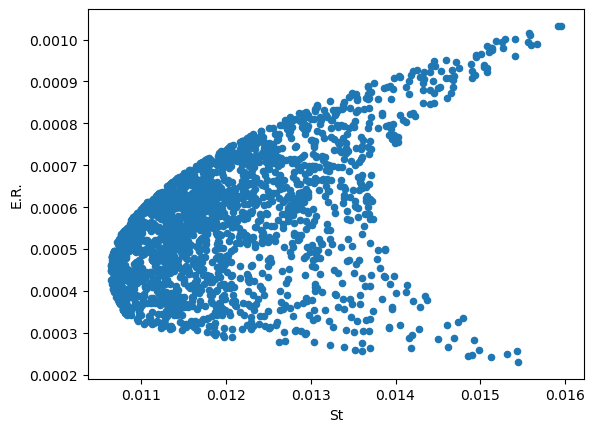

In [12]:
x.plot(x='St',y='E.R.',kind='scatter')

### Identify significant portfolios
    - Mean:Variance Optimised i.e. Max Sharpe 
    - Min Vairance 

In [17]:

x.iloc[x['Sharpe'].nlargest(1).index] #Max Sharpe Ratio Optimum Portfolio

,E.R.,St,Sharpe,weights
289,0.001085,0.016265,0.066682,"[0.08635214011936398, 0.008138309103115759, 0...."


In [14]:
x.iloc[x['St'].nsmallest(1).index]#Min Variance Portfolio

,E.R.,St,Sharpe,weights
1153,0.00039,0.010741,0.036271,"[0.6821078557847422, 0.197631530229022, 0.1202..."


In [20]:
x.nsmallest(1,'St')

,E.R.,St,Sharpe,weights
1153,0.00039,0.010741,0.036271,"[0.6821078557847422, 0.197631530229022, 0.1202..."


In [16]:
x.nlargest(1, 'Sharpe') #wtf so i could've done it like this the whole time?

,E.R.,St,Sharpe,weights
289,0.001085,0.016265,0.066682,"[0.08635214011936398, 0.008138309103115759, 0...."
